# The material presented in this notebook is for using in Introduction to Deep Learning (ECE 685D) course, Duke University, Fall 2020.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

## We 'll talk about feature selection through three methods:

* ### Principal Component Analysis (PCA)
* ### Linear Discriminant Analysis (LDA)
* ### LASSO ($\ell_1$-Regularization)

# __Loading IRIS dataset__

(150, 4) (150,)
[0 1 2]
['setosa' 'versicolor' 'virginica']


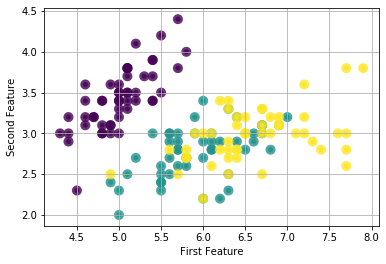

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print(X.shape,y.shape)
print(np.unique(y))
print(target_names)
plt.scatter(X[:,0], X[:,1], marker = 'o', c = y, lw =5, s= 25, alpha=.8)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.grid()

## __1 - Principal Component Analysis (PCA)__
* ### Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.

In [3]:
pca = PCA(n_components=2)
X_r1 = pca.fit(X).transform(X)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
X_r1.shape

explained variance ratio (first two components): [0.92461872 0.05306648]


(150, 2)

### __Plotting Singular values__

([<matplotlib.axis.XTick at 0x1a1c14fc50>,
 <a list of 4 Text xticklabel objects>)

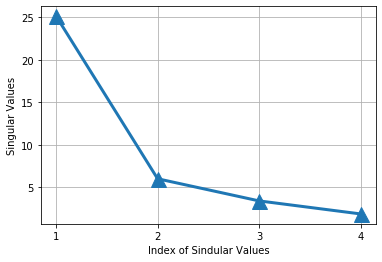

In [4]:
pcafull = PCA(n_components=4)
_ = pcafull.fit(X).transform(X)
plt.plot([1,2,3,4], pcafull.singular_values_ , '^-', lw=3, markersize = 15)
plt.xlabel('Index of Sindular Values')
plt.ylabel('Singular Values')
plt.grid()
plt.xticks([1,2,3,4], [1,2,3,4])

### __Explained_variance_ratio__
* ## $\frac{\sigma_i^2}{\|\Sigma\|^2_F}$  where $i=1,\ldots,4 \ \ and \ \  \Sigma = diag(\sigma_1, \sigma_2, \sigma_3, \sigma_4)$

In [5]:
print(pcafull.singular_values_)
(pcafull.singular_values_)**2/np.linalg.norm(pcafull.singular_values_)**2

[25.09996044  6.01314738  3.41368064  1.88452351]


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

### __Plotting the first two principle components__

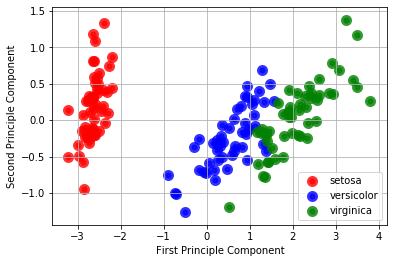

In [6]:
colors = ['red', 'blue', 'green']
for col, ind in zip(colors, np.unique(y)):
    plt.scatter(X_r1[y==ind, 0], X_r1[y==ind, 1], c=col,  alpha=.8, lw=5)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.grid()
plt.legend(target_names)

## __2 - Linear Discriminant Analysis (LDA)__
* ### Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. 
* ### LDA, in contrast to PCA, is a supervised dimensionality reduction using known class labels.
* ###  The dimension of the output is necessarily less than the number of classes, so only makes sense in a multiclass setting.
* ### the lower dimension subspace is spanned by the eigen vector of matrix $S_W^{-1}S_B$ where $S_W$ and $S_B$ denote the __within-class scatter matrix__ and __between-class scatter matrix__, respectively.

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))
print(X_r2.shape)
lda.scalings_   ## the spnning vectors for the lower-dimension subspace

explained variance ratio (first two components): [0.9912126 0.0087874]
(150, 2)


array([[-0.82937764,  0.02410215],
       [-1.53447307,  2.16452123],
       [ 2.20121166, -0.93192121],
       [ 2.81046031,  2.83918785]])

### __Plotting the first two discriminant components__

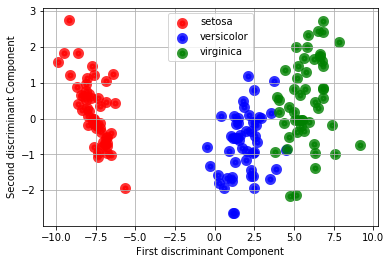

In [255]:
colors = ['red', 'blue', 'green']
for col, ind in zip(colors, np.unique(y)):
    plt.scatter(X_r2[y==ind, 0], X_r2[y==ind, 1], c=col,  alpha=.8, lw=5)
plt.xlabel('First discriminant Component')
plt.ylabel('Second discriminant Component')
plt.grid()
plt.legend(target_names)

## __3-Logistic regression with $\ell_1$ Rgularization__

In [8]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [15]:
clf = LogisticRegression(solver='saga', multi_class='multinomial', penalty='l1', C=0.1).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_r3 = model.transform(X)
print(X_r3.shape)

(150, 2)


### __Plotting two none_zero components__

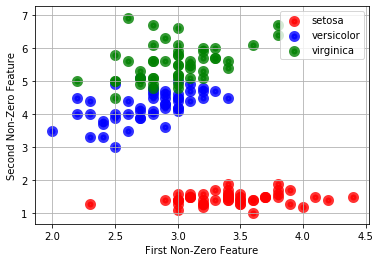

In [12]:
colors = ['red', 'blue', 'green']
for col, ind in zip(colors, np.unique(y)):
    plt.scatter(X_r3[y==ind, 0], X_r3[y==ind, 1], c=col,  alpha=.8, lw=5)
plt.xlabel('First Non-Zero Feature')
plt.ylabel('Second Non-Zero Feature')
plt.grid()
plt.legend(target_names)

## Putting everything togehter

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]] (150, 4) Raw Data
----------------------------------------
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] (150, 2) PCA
----------------------------------------
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] (150, 2) LDA
----------------------------------------
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]] (150, 2) LASSO
----------------------------------------


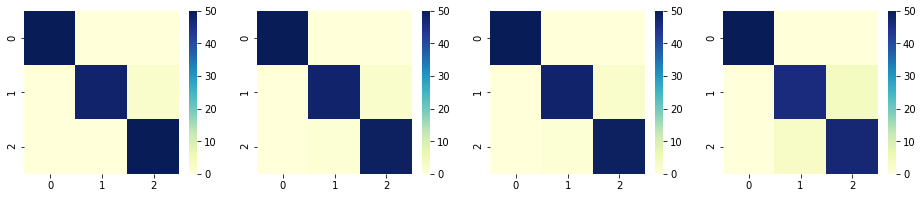

In [18]:
FeatureSelectionMethod = ['Raw Data', 'PCA', 'LDA', 'LASSO']
fig, ax = plt.subplots(1, 4, figsize =(16,3))
XX = [X, X_r1, X_r2, X_r3]
for i in range(4):
    if i != 3:
        clf = LogisticRegression(solver='saga', multi_class='multinomial', penalty='none', C=100).fit(XX[i], y)
        y_pred = clf.predict(XX[i])
    else:
        clf = LogisticRegression(solver='saga', multi_class='multinomial', penalty='l1', C=0.1).fit(X, y)
        model = SelectFromModel(clf, prefit=True)
        X_r3 = model.transform(X)
        clf_t = LogisticRegression(solver='saga', multi_class='multinomial', penalty='l1', C=0.1).fit(X_r3, y)
        y_pred = clf_t.predict(X_r3)
    sn.heatmap(confusion_matrix(y, y_pred), cmap="YlGnBu", ax = ax[i])
    print(confusion_matrix(y, y_pred), XX[i].shape, FeatureSelectionMethod[i])
    print('----'*10)